In [27]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sbn

import statsmodels.api as sm
## import pandas ols 

In [2]:
res = pd.read_csv('/home/teddy/local/gsnn-lib/output/NormAblation/results.csv')
res.head()

,uuid,add_function_self_edges,batch,channels,checkpoint,clip_grad,compile,crit,data,dropout,...,mean_r_val,median_r_test,median_r_val,mse_test,mse_val,r2_test,r2_val,r_flat_test,r_flat_val,time_elapsed
0,0da4f298-73ed-4d08-87f4-6845b96b6d88,True,124,4,True,NaN,False,mse,/home/exacloud/gscratch/mcweeney_lab/evans/gsn...,0.1,...,0.205163,0.185731,0.190496,0.936735,0.938753,0.045431,0.048667,0.249723,0.255400,20257.418527
1,2864706e-dae1-49a2-9bef-69b603b51795,True,256,2,True,NaN,False,mse,/home/exacloud/gscratch/mcweeney_lab/evans/gsn...,0.1,...,0.330941,0.311815,0.321527,0.882090,0.875930,0.100842,0.112048,0.366982,0.373638,12187.573782
2,8c5e4701-8b74-4588-a6f7-1104565839ba,True,256,4,True,NaN,False,mse,/home/exacloud/gscratch/mcweeney_lab/evans/gsn...,0.0,...,0.327484,0.314452,0.315153,0.865723,0.870401,0.117782,0.117858,0.372440,0.371126,43280.201553
3,fd34e24f-2c62-444b-af39-7facec2bbae1,True,1024,4,True,NaN,False,mse,/home/exacloud/gscratch/mcweeney_lab/evans/gsn...,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,762549ee-67d3-4e6b-b3b1-191a56f8d382,True,512,2,True,NaN,False,mse,/home/exacloud/gscratch/mcweeney_lab/evans/gsn...,0.1,...,0.247200,0.234759,0.232424,0.907946,0.913256,0.074926,0.074720,0.304089,0.303335,31533.251263


In [5]:
# Proportion of configs that failed 
res.r2_test.isna().mean()

0.49473684210526314

In [6]:
# number of configs that succeeded
res.r2_test.notna().sum()

48

In [8]:
# test performance ranked by val performance 
res.sort_values('r2_val', ascending=False)['r2_test'].head()

26    0.171635
34    0.169667
20    0.157323
41    0.160967
36    0.150425
Name: r2_test, dtype: float64

In [9]:
res.columns

Index(['uuid', 'add_function_self_edges', 'batch', 'channels', 'checkpoint',
       'clip_grad', 'compile', 'crit', 'data', 'dropout', 'edge_channels',
       'epochs', 'fold_dir', 'ignore_cuda', 'init', 'layers', 'lr', 'metric',
       'min_delta', 'model', 'no_bias', 'nonlin', 'norm', 'optim', 'out',
       'patience', 'prune_every', 'prune_threshold', 'randomize', 'sched',
       'share_layers', 'uid', 'wd', 'workers', 'eval_at_epoch', 'mean_r_test',
       'mean_r_val', 'median_r_test', 'median_r_val', 'mse_test', 'mse_val',
       'r2_test', 'r2_val', 'r_flat_test', 'r_flat_val', 'time_elapsed'],
      dtype='object')

In [15]:
# top 5 best configs
res.sort_values('r2_val', ascending=False)[['norm', 'batch', 'channels','dropout', 'edge_channels', 'init', 'layers', 'lr', 'r2_test']].head(5)

,norm,batch,channels,dropout,edge_channels,init,layers,lr,r2_test
26,batch,256,8,0.1,1,kaiming,10,0.010,0.171635
34,batch,512,4,0.1,1,kaiming,10,0.010,0.169667
20,edgebatch,512,4,0.1,1,kaiming,10,0.001,0.157323
41,batch,1024,2,0.1,1,kaiming,10,0.010,0.160967
36,batch,256,2,0.1,1,kaiming,10,0.001,0.150425


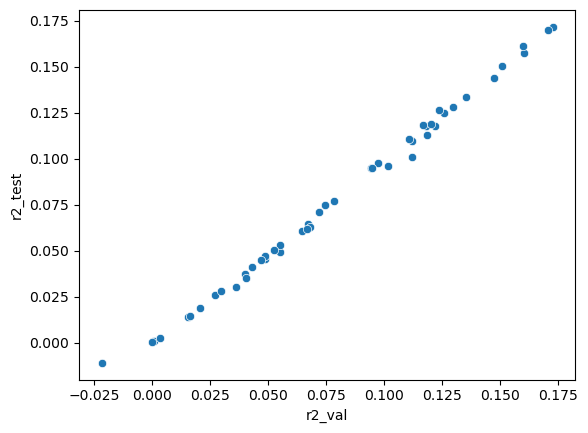

In [17]:
# nice to see val and test are stable 
plt.figure() 
sbn.scatterplot(x='r2_val', y='r2_test', data=res)
plt.show()

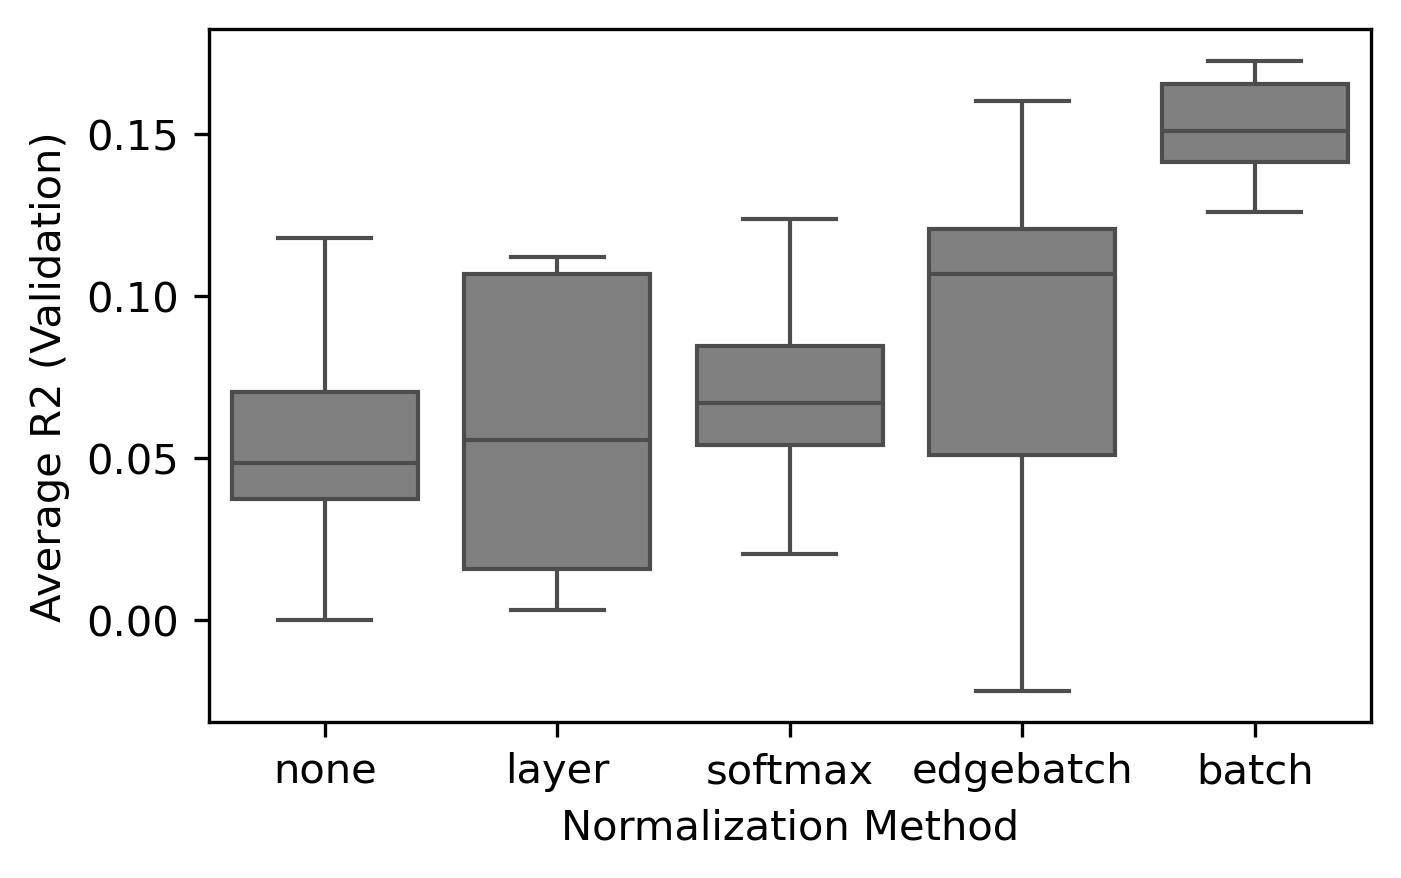

In [48]:
plt.figure(figsize=(5,3), dpi=300)
sbn.boxplot(x='norm', y='r2_val', data=res[lambda x: x.r2_val.notna()], order=res[lambda x: x.r2_val.notna()].groupby('norm')['r2_val'].median().sort_values().index, color='gray')
plt.xlabel('Normalization Method')
plt.ylabel('Average R2 (Validation)')
plt.show()

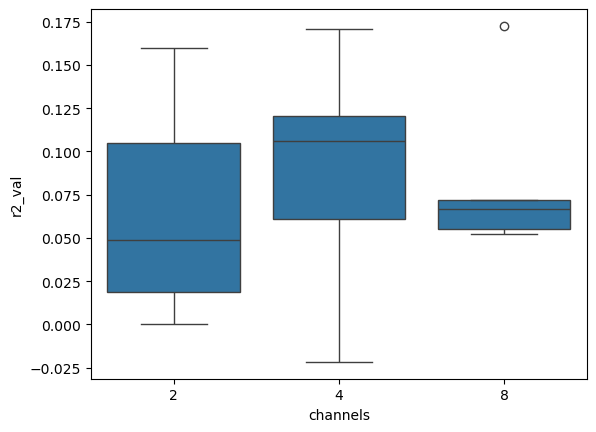

In [20]:
plt.figure()
sbn.boxplot(x='channels', y='r2_val', data=res)
plt.show()

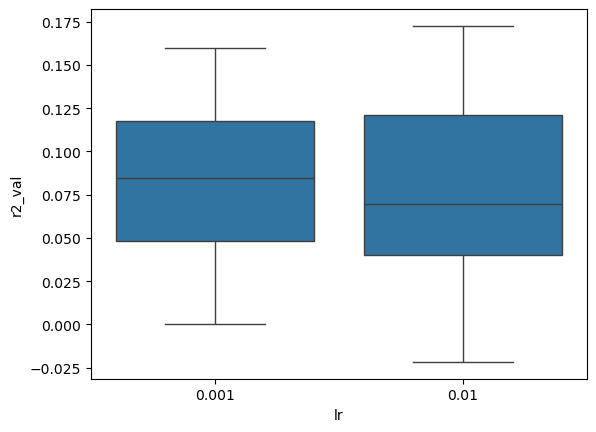

In [21]:
plt.figure()
sbn.boxplot(x='lr', y='r2_val', data=res)
plt.show()

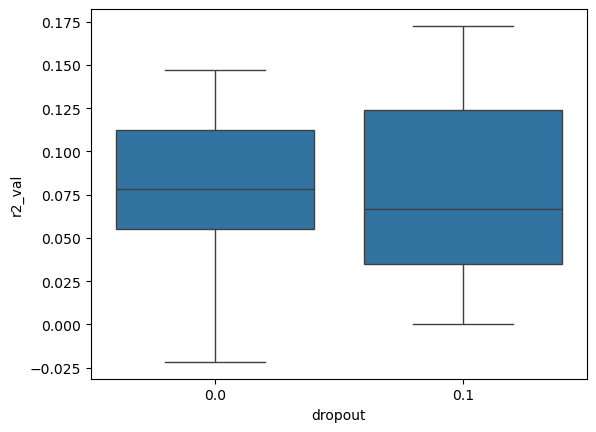

In [22]:
plt.figure()
sbn.boxplot(x='dropout', y='r2_val', data=res)
plt.show()

In [31]:
#'norm', 'batch', 'channels','dropout', 'edge_channels', 'init', 'layers', 'lr', 'r2_test'

# run pandas ols model 

result = sm.OLS.from_formula(formula="r2_test ~ norm + batch + channels + dropout + lr", data=res).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                r2_test   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     4.892
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           0.000314
Time:                        09:48:27   Log-Likelihood:                 92.927
No. Observations:                  48   AIC:                            -167.9
Df Residuals:                      39   BIC:                            -151.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1187      0